In [1]:
import nltk

In [66]:
from collections import Counter
from nltk.tokenize import NLTKWordTokenizer
#stopwords = nltk.corpus.stopwords.words('english')
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

import matplotlib.pyplot as plt
import string


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...


In [36]:
#read the file 
file = open("../Assets/test.txt", encoding="utf-8").read()
print(file)

I am honored to be with you today at your commencement from one of the finest universities in the world. I never graduated from college. Truth be told, this is the closest I’ve ever gotten to a college graduation. Today I want to tell you three stories from my life. That’s it. No big deal. Just three stories.

Related to this story
2005 Stanford Commencement coverage
The first story is about connecting the dots.

I dropped out of Reed College after the first 6 months, but then stayed around as a drop-in for another 18 months or so before I really quit. So why did I drop out?

It started before I was born. My biological mother was a young, unwed college graduate student, and she decided to put me up for adoption. She felt very strongly that I should be adopted by college graduates, so everything was all set for me to be adopted at birth by a lawyer and his wife. Except that when I popped out they decided at the last minute that they really wanted a girl. So my parents, who were on a wai

In [30]:
#let's convert it to lower case
lower_text = file.lower()
#now remove the puctuation
clear_punctuation = lower_text.translate(str.maketrans('','',string.punctuation))

In [32]:
#now we will tokenize the text with nltk word_tokenize
tokenize_word = NLTKWordTokenizer().tokenize(clear_punctuation)
print(tokenize_word)

['i', 'am', 'honored', 'to', 'be', 'with', 'you', 'today', 'at', 'your', 'commencement', 'from', 'one', 'of', 'the', 'finest', 'universities', 'in', 'the', 'world', 'i', 'never', 'graduated', 'from', 'college', 'truth', 'be', 'told', 'this', 'is', 'the', 'closest', 'i', '’', 've', 'ever', 'gotten', 'to', 'a', 'college', 'graduation', 'today', 'i', 'want', 'to', 'tell', 'you', 'three', 'stories', 'from', 'my', 'life', 'that', '’', 's', 'it', 'no', 'big', 'deal', 'just', 'three', 'stories', 'related', 'to', 'this', 'story', '2005', 'stanford', 'commencement', 'coverage', 'the', 'first', 'story', 'is', 'about', 'connecting', 'the', 'dots', 'i', 'dropped', 'out', 'of', 'reed', 'college', 'after', 'the', 'first', '6', 'months', 'but', 'then', 'stayed', 'around', 'as', 'a', 'dropin', 'for', 'another', '18', 'months', 'or', 'so', 'before', 'i', 'really', 'quit', 'so', 'why', 'did', 'i', 'drop', 'out', 'it', 'started', 'before', 'i', 'was', 'born', 'my', 'biological', 'mother', 'was', 'a', 'yo

In [37]:
without_stopwords = []
for word in tokenize_word:
    if word not in stopwords.words('english'):
        without_stopwords.append(word)


In [38]:
print(without_stopwords)

['honored', 'today', 'commencement', 'one', 'finest', 'universities', 'world', 'never', 'graduated', 'college', 'truth', 'told', 'closest', '’', 'ever', 'gotten', 'college', 'graduation', 'today', 'want', 'tell', 'three', 'stories', 'life', '’', 'big', 'deal', 'three', 'stories', 'related', 'story', '2005', 'stanford', 'commencement', 'coverage', 'first', 'story', 'connecting', 'dots', 'dropped', 'reed', 'college', 'first', '6', 'months', 'stayed', 'around', 'dropin', 'another', '18', 'months', 'really', 'quit', 'drop', 'started', 'born', 'biological', 'mother', 'young', 'unwed', 'college', 'graduate', 'student', 'decided', 'put', 'adoption', 'felt', 'strongly', 'adopted', 'college', 'graduates', 'everything', 'set', 'adopted', 'birth', 'lawyer', 'wife', 'except', 'popped', 'decided', 'last', 'minute', 'really', 'wanted', 'girl', 'parents', 'waiting', 'list', 'got', 'call', 'middle', 'night', 'asking', '“', 'unexpected', 'baby', 'boy', 'want', '”', 'said', '“', 'course', '”', 'biologic

In [59]:
emotion_list = []
with open("../Assets/emotions.txt", 'r') as file:
    for line in file:
        cleaned_list = line.replace("\n",'').replace(",",'').replace("'", '').strip()
        word,emotion = cleaned_list.split(':')
        if word in without_stopwords:
            emotion_list.append(emotion)
print(emotion_list)

[' happy', ' happy', ' attached', ' happy', ' attracted', ' alone', ' free', ' hated', ' happy', ' entitled', ' happy', ' loved', ' hated', ' entitled']


In [67]:
counter_emotion = Counter(emotion_list)
# now we will analyze the sentiment with sentiment analyzer of nltk

def sentiment_analyse(clear_punctuation):
    score = SentimentIntensityAnalyzer().polarity_scores(clear_punctuation)
    print(score)

sentiment_analyse(clear_punctuation)

{'neg': 0.091, 'neu': 0.747, 'pos': 0.162, 'compound': 0.9996}


NameError: name 'counting' is not defined

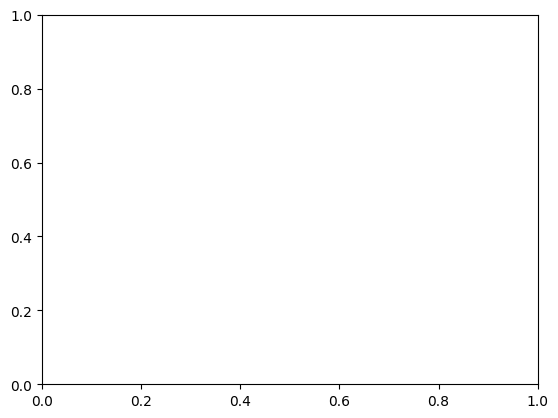

In [68]:
fig, axs = plt.subplots()
axs.bar(counter_emotion.keys(), counter_emotion.values())
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()